**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Necessary Packages**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.svm import SVC



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/onlinefraud.csv")

In [ ]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.sample()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
888312,42,CASH_OUT,66653.29,C868682120,11550.0,0.0,C1919881039,0.0,66653.29,0,0


In [ ]:
f= df[df['isFraud'] ==1]
f

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


Since the dataset is huge, taking a sample of the dataset, to get a balanced dataset

In [ ]:
import pandas as pd

# the DataFrame is divided into two groups based on the 'isFraud' column
g0 = df[df['isFraud'] == 0]
g1 = df[df['isFraud'] == 1]

# total is 16,000
num_g0 = int(8000 * len(g0) / (len(g0) + len(g1)))
num_g1 = 16000 - num_g0

sampleg0 = g0.sample(n=num_g0, replace=True, random_state=42)
sampleg1 = g1.sample(n=num_g1, replace=True, random_state=42)

balanced_df = pd.concat([sampleg0, sampleg1])

# Now 'balanced_df' contains a total of 16,000 samples, balanced based on the 'isFraud' column

In [ ]:
balanced_df['isFraud'].value_counts()

isFraud
1    8011
0    7989
Name: count, dtype: int64

In [ ]:
bdf=balanced_df
bdf.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1694553,False,False,False,False,False,False,False,False,False,False,False
4308043,False,False,False,False,False,False,False,False,False,False,False
4930379,False,False,False,False,False,False,False,False,False,False,False
2236606,False,False,False,False,False,False,False,False,False,False,False
1571764,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1030319,False,False,False,False,False,False,False,False,False,False,False
6168674,False,False,False,False,False,False,False,False,False,False,False
5987970,False,False,False,False,False,False,False,False,False,False,False
1005246,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
bdf.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
fraud_count = bdf['isFraud'].value_counts()
fraud_count

isFraud
1    8011
0    7989
Name: count, dtype: int64

In [ ]:
len(bdf)

16000

In [ ]:
t = pd.get_dummies(bdf['type'], drop_first=True)
bdf_new = pd.concat([bdf, t], axis=1)
bdf_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1694553,159,PAYMENT,7761.41,C1322676788,126330.00,118568.59,M805179360,0.00,0.00,0,0,False,False,True,False
4308043,307,PAYMENT,9363.17,C1025671823,427248.51,417885.34,M1162917018,0.00,0.00,0,0,False,False,True,False
4930379,350,PAYMENT,28035.27,C153907869,9890.00,0.00,M108610323,0.00,0.00,0,0,False,False,True,False
2236606,186,CASH_OUT,394781.26,C695870266,412.00,0.00,C374707826,37951.44,432732.71,0,0,True,False,False,False
1571764,155,CASH_OUT,166078.15,C111564550,0.00,0.00,C1379031360,20974596.81,21140674.96,0,0,True,False,False,False


In [ ]:
X = bdf_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = bdf_new['isFraud']
X.shape, y.shape

((16000, 11), (16000,))

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Evaluating performance of different Models**

**Decision Tree**

Training

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


tree_model = DecisionTreeClassifier(random_state=42)


# Train model
tree_model.fit(X_train, y_train)
# Evaluating the Decision Tree model
tree_accuracy = tree_model.score(X_test, y_test)
print(f'Decision Tree Test Accuracy: {tree_accuracy}')

# predictions with Decision Tree
tree_pred = tree_model.predict(X_test)
#evaluation metrics
print(classification_report(y_test, tree_pred))

# Calculate the probabilities for each class
tree_prob = tree_model.predict_proba(X_test)[:, 1]

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, tree_prob)
roc_auc = auc(fpr, tpr)



Decision Tree Test Accuracy: 0.9922916666666667
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2380
           1       0.99      1.00      0.99      2420

    accuracy                           0.99      4800
   macro avg       0.99      0.99      0.99      4800
weighted avg       0.99      0.99      0.99      4800



**Recall, f1score, Precision**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
p0 = precision_score(y_test, tree_pred, pos_label=0)
p1 = precision_score(y_test, tree_pred, pos_label=1)

r0 = recall_score(y_test, tree_pred, pos_label=0)
r1 = recall_score(y_test, tree_pred, pos_label=1)

f10 = f1_score(y_test, tree_pred, pos_label=0)
f11 = f1_score(y_test, tree_pred, pos_label=1)

In [ ]:
print("Precision for NonFraud Class: ", p0)
print("Precision for Fraud Class: ", p1)

print("Recall for NonFraud Class: ", r0)
print("Recall for Fraud Class: ", r1)

print("F1 Score for NonFraud Class: ", f10)
print("F1 Score Fraud Class: ", f11)

Precision for NonFraud Class:  0.996608732513777
Precision for Fraud Class:  0.9881196231052847
Recall for NonFraud Class:  0.9878151260504202
Recall for Fraud Class:  0.996694214876033
F1 Score for NonFraud Class:  0.9921924456636422
F1 Score Fraud Class:  0.9923883974490846


Evaluating how model performs for each class independently`

In [ ]:
from tabulate import tabulate

data = [
    ["NonFraud Class", p0, r0, f10],
    ["Fraud Class", p1, r1, f11]
]

heading = ["Class", "Precision", "Recall", "F1 Score"]

# Print the table
print(tabulate(data, headers=heading, tablefmt="grid"))


+----------------+-------------+----------+------------+
| Class          |   Precision |   Recall |   F1 Score |
+================+=============+==========+============+
| NonFraud Class |    0.996609 | 0.987815 |   0.992192 |
+----------------+-------------+----------+------------+
| Fraud Class    |    0.98812  | 0.996694 |   0.992388 |
+----------------+-------------+----------+------------+


**Confusion Matrix**

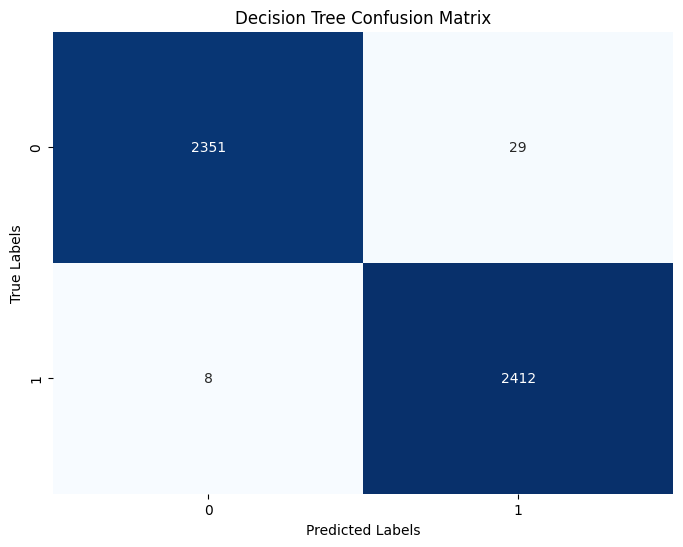

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix')
plt.show()


**ROC_AUC Curve**

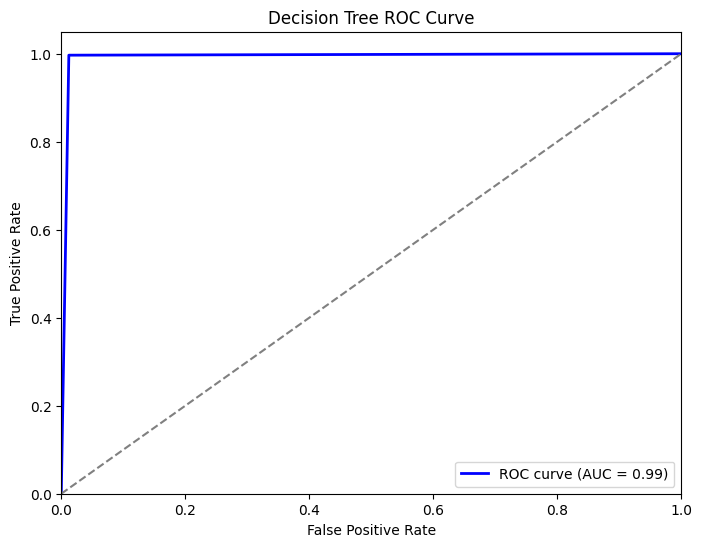

Decision Tree AUC Score: 0.99


In [ ]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

print(f'Decision Tree AUC Score: {roc_auc:.2f}')

In [ ]:
import numpy as np

**Cross Validation**

In [ ]:

cv_s = cross_val_score(tree_model, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_s}')
print(f'Average Cross-Validation Score: {np.mean(cv_s):.4f}')
# cv_s ( Cross-validation scores)

Cross-Validation Scores: [0.99017857 0.98973214 0.98928571 0.98883929 0.98973214]
Average Cross-Validation Score: 0.9896


In [ ]:
# Calculate the probabilities for each class
tree_prob = tree_model.predict_proba(X_test)[:, 1]

**ROC_AUC Curve after Cross Validation**

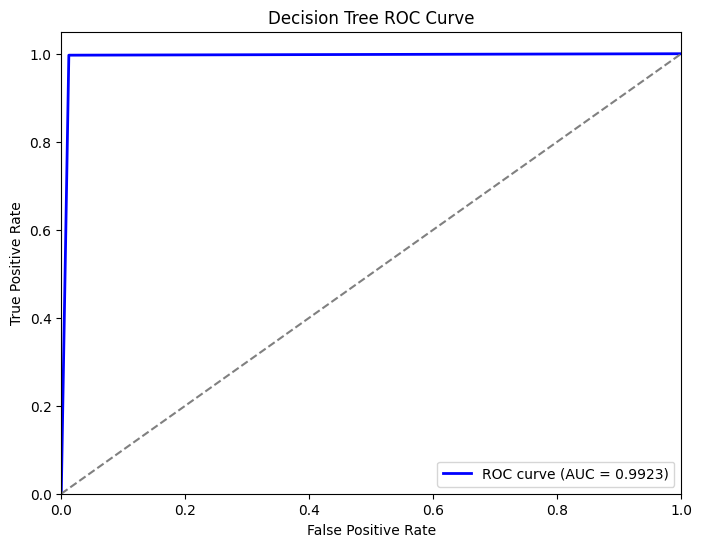

Decision Tree AUC Score: 0.9923


In [ ]:
# Calculate the fpr and tpr
fpr, tpr, thresholds = roc_curve(y_test, tree_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

# Print the AUC score
print(f'Decision Tree AUC Score: {roc_auc:.4f}')

**Precision, Recall, f1score**

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, tree_pred)
print("Recall:", recall)


Recall: 0.996694214876033


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, tree_pred)
f1

0.9923883974490846

In [ ]:
from sklearn.metrics import precision_score
p= precision_score(y_test,tree_pred)
p

0.9881196231052847

**SVM**

**Training**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #4800:test size

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm_model.fit(X_train, y_train)

svm_accuracy = svm_model.score(X_test, y_test)
print(f'SVM Test Accuracy: {svm_accuracy}')

svm_p = svm_model.predict(X_test)

print(classification_report(y_test, svm_p))


SVM Test Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      2380
           1       0.99      0.66      0.79      2420

    accuracy                           0.82      4800
   macro avg       0.86      0.83      0.82      4800
weighted avg       0.87      0.82      0.82      4800



**Recall, f1score, Precision**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
p0 = precision_score(y_test, svm_p, pos_label=0)
p1 = precision_score(y_test, svm_p, pos_label=1)

r0 = recall_score(y_test, svm_p, pos_label=0)
r1 = recall_score(y_test, svm_p, pos_label=1)

f10 = f1_score(y_test, svm_p, pos_label=0)
f11 = f1_score(y_test, svm_p, pos_label=1)

In [ ]:
print("Precision for NonFraud Class: ", p0)
print("Precision for Fraud Class: ", p1)

print("Recall for NonFraud Class: ", r0)
print("Recall for Fraud Class: ", r1)

print("F1 Score for NonFraud Class: ", f10)
print("F1 Score Fraud Class: ", f11)

Precision for NonFraud Class:  0.7421383647798742
Precision for Fraud Class:  0.9876543209876543
Recall for NonFraud Class:  0.9915966386554622
Recall for Fraud Class:  0.6611570247933884
F1 Score for NonFraud Class:  0.8489208633093526
F1 Score Fraud Class:  0.792079207920792


Evaluating how model performs for each class independently

In [ ]:
from tabulate import tabulate

data = [
    ["NonFraud Class", p0, r0, f10],
    ["Fraud Class", p1, r1, f11]
]

heading = ["Class", "Precision", "Recall", "F1 Score"]

# Print the table
print(tabulate(data, headers=heading, tablefmt="grid"))


+----------------+-------------+----------+------------+
| Class          |   Precision |   Recall |   F1 Score |
+================+=============+==========+============+
| NonFraud Class |    0.742138 | 0.991597 |   0.848921 |
+----------------+-------------+----------+------------+
| Fraud Class    |    0.987654 | 0.661157 |   0.792079 |
+----------------+-------------+----------+------------+


**Confusion Matrix**

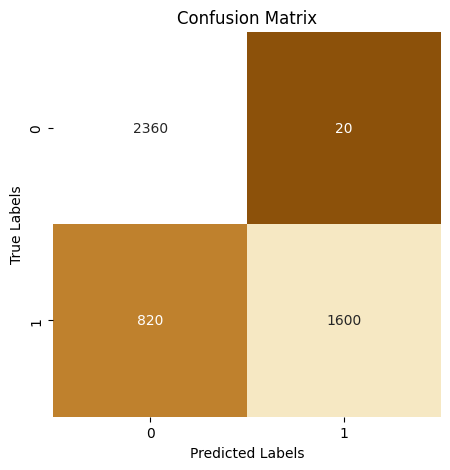

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cm = confusion_matrix(y_test, svm_p)
plt.figure(figsize=(5, 5))
colors = ['#8C510A', '#BF812D', '#DFC27D', '#F6E8C3', '#FFFFFF']  # Example shades of brown
cmap_browns = ListedColormap(colors)
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_browns, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**ROC_AUC Curve**

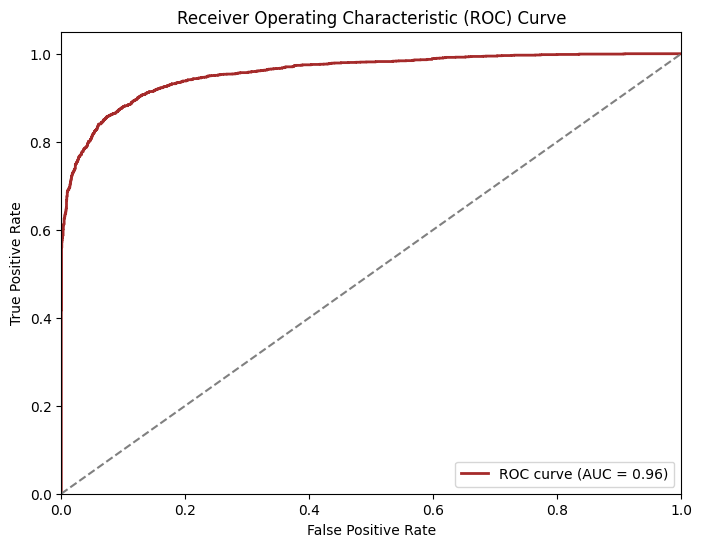

AUC Score: 0.96


In [ ]:
from sklearn.metrics import roc_curve, auc

svm_prob = svm_model.decision_function(X_test)

# fpr and tpr
fpr, tpr, thresholds = roc_curve(y_test, svm_prob)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# AUC score
print(f'AUC Score: {roc_auc:.2f}')


**Comparison between SVM and Decision Tree**

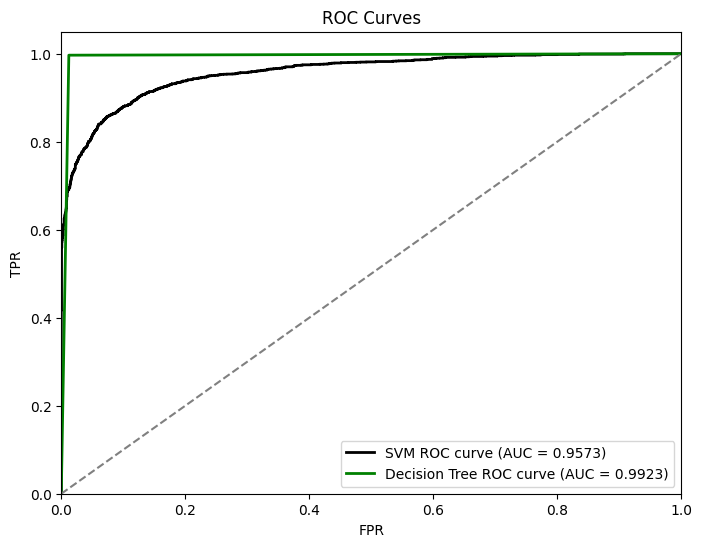

In [ ]:
# Ploting ROC curves for both models
plt.figure(figsize=(8, 6))
# SVM ROC
svm_s = svm_model.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_s)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, color='black', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.4f})')

# Decision Tree ROC
tree_prob = tree_model.predict_proba(X_test)[:, 1]
dec_fpr, dec_tpr, _ = roc_curve(y_test, tree_prob)
roc_auc_tree = auc(dec_fpr, dec_tpr)
plt.plot(dec_fpr, dec_tpr, color='green', lw=2, label=f'Decision Tree ROC curve (AUC = {roc_auc_tree:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


HyperParameter Tuning using Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

svm = SVC()

# hyperparameter grid
param_grid = {
    'C': uniform(loc=0, scale=10),  # Penalty parameter C
    'gamma': ['scale', 'auto'],     # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
}

random_s = RandomizedSearchCV(estimator=svm, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

random_s.fit(X_train, y_train)

# Best hyperparameters
best_param = random_s.best_params_
best_s = random_s.best_score_

print("Best Hyperparameters:", best_param)
print("Best Score:", best_s)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# hyperapapameter grid
param_dist_tree = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

tree_model = DecisionTreeClassifier(random_state=42)

random_search_tree = RandomizedSearchCV(estimator=tree_model, param_distributions=param_dist_tree, n_iter=100, cv=5, random_state=42)

# Best hyperparameters
random_search_tree.fit(X_train, y_train)
print("Best Hyperparameters for Decision Tree:")
print(random_search_tree.best_params_)

# Evaluate the model
best_tree_model = random_search_tree.best_estimator_
tree_accuracy_tuned = best_tree_model.score(X_test, y_test)
print(f'Accuracy after tuning: {tree_accuracy_tuned:.4f}')


Best Hyperparameters for Decision Tree:
{'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3}
Accuracy after tuning: 0.9921


**Neural Networks (MLP)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the neural network model
m1 = Sequential([
        Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)), # 64 neurons in 1st layer
        Dropout(0.2),
        Dense(units=32, activation='relu'), ## 32 neurons in 2nd layer with 64 neurons as input
        Dropout(0.2),
        Dense(units=1, activation='sigmoid') #1 neuron because binary classification
    ])
# Compiling the model
m1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
m1.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = m1.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Making predictions
predictions = m1.predict(X_test)


Epoch 1/10
175/175 [==============================] - 7s 13ms/step - loss: 0.4063 - accuracy: 0.8239 - val_loss: 0.2835 - val_accuracy: 0.8773
Epoch 2/10
175/175 [==============================] - 2s 10ms/step - loss: 0.2796 - accuracy: 0.8738 - val_loss: 0.2442 - val_accuracy: 0.8944
Epoch 3/10
175/175 [==============================] - 1s 4ms/step - loss: 0.2484 - accuracy: 0.8896 - val_loss: 0.2186 - val_accuracy: 0.9058
Epoch 4/10
175/175 [==============================] - 1s 5ms/step - loss: 0.2291 - accuracy: 0.8969 - val_loss: 0.2082 - val_accuracy: 0.9098
Epoch 5/10
175/175 [==============================] - 1s 6ms/step - loss: 0.2195 - accuracy: 0.9037 - val_loss: 0.1970 - val_accuracy: 0.9144
Epoch 6/10
175/175 [==============================] - 1s 5ms/step - loss: 0.2143 - accuracy: 0.9077 - val_loss: 0.1958 - val_accuracy: 0.9175
Epoch 7/10
175/175 [==============================] - 1s 6ms/step - loss: 0.2009 - accuracy: 0.9113 - val_loss: 0.1860 - val_accuracy: 0.9190
Epoc

**Visualisation**

In [ ]:
print(m1.summary()) #visualisation

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


During predictions, dropout is not applied, and all units are active. Therefore, dropout layers do not contribute any trainable parameters to the model.

The dropout layers will have a regularization effect during training, despite having no trainable parameters. They help prevent overfitting by adding noise to the network and encouraging robustness.

In [ ]:
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

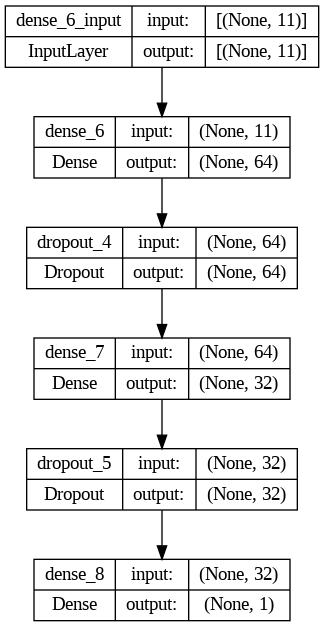

In [ ]:
plot_model(m1, to_file='model_flowchart.png', show_shapes=True, show_layer_names=True) #visualisation


In [ ]:
#input layer shape- 11:number of features in the dataset

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Increasing hidden layers

In [ ]:
# Building the neural network model with more hidden layers
m2 = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=16, activation='relu'),  # Adding an additional hidden layer
    Dropout(0.2),  # Dropout layer after the additional hidden layer
     Dense(units=8, activation='relu'),  # Adding an additional hidden layer
    Dropout(0.2),  # Dropout layer after the additional hidden layer
    Dense(units=1, activation='sigmoid')  # Output layer with sigmoid activation
])

# Compilation of the model
m2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
history = m2.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# Model Evaluation
loss, accuracy = m2.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Making predictions
predictions = m2.predict(X_test)


Epoch 1/10
175/175 [==============================] - 3s 4ms/step - loss: 0.4768 - accuracy: 0.7739 - val_loss: 0.2928 - val_accuracy: 0.8708
Epoch 2/10
175/175 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8642 - val_loss: 0.2411 - val_accuracy: 0.8960
Epoch 3/10
175/175 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.8871 - val_loss: 0.2091 - val_accuracy: 0.9121
Epoch 4/10
175/175 [==============================] - 1s 3ms/step - loss: 0.2401 - accuracy: 0.8929 - val_loss: 0.2011 - val_accuracy: 0.9162
Epoch 5/10
175/175 [==============================] - 1s 3ms/step - loss: 0.2231 - accuracy: 0.9032 - val_loss: 0.1902 - val_accuracy: 0.9165
Epoch 6/10
175/175 [==============================] - 1s 3ms/step - loss: 0.2142 - accuracy: 0.9054 - val_loss: 0.1830 - val_accuracy: 0.9233
Epoch 7/10
175/175 [==============================] - 1s 3ms/step - loss: 0.2029 - accuracy: 0.9134 - val_loss: 0.1704 - val_accuracy: 0.9294
Epoch 

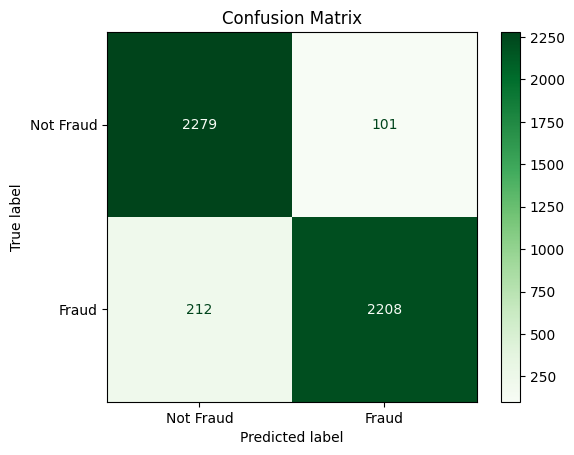

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Confusion Matrix
y_pred = (predictions > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")

plt.show()

# Saving model
m1.save("fraud_detection_model.h5")


**Visualisation**

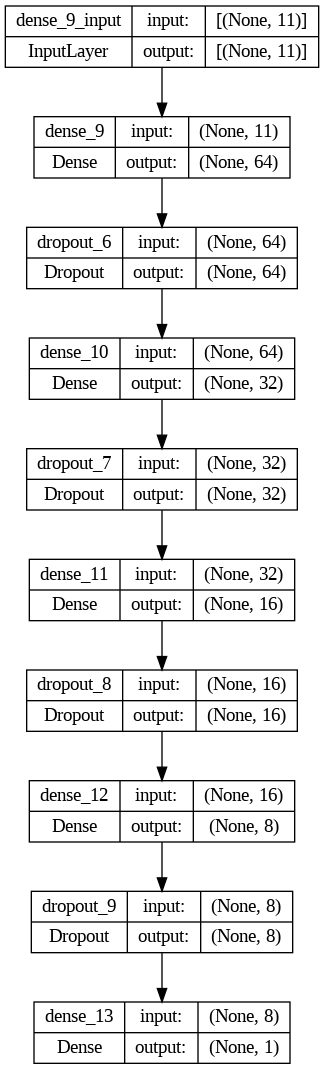

In [ ]:
plot_model(m2, to_file='model_flowchart.png', show_shapes=True, show_layer_names=True) #visualisation
#input layer shape- 11:number of features in the dataset

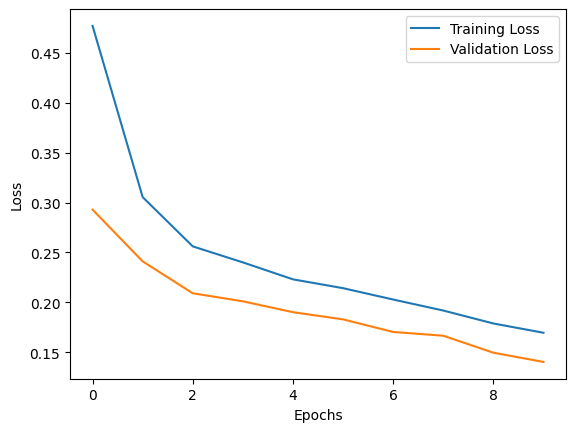

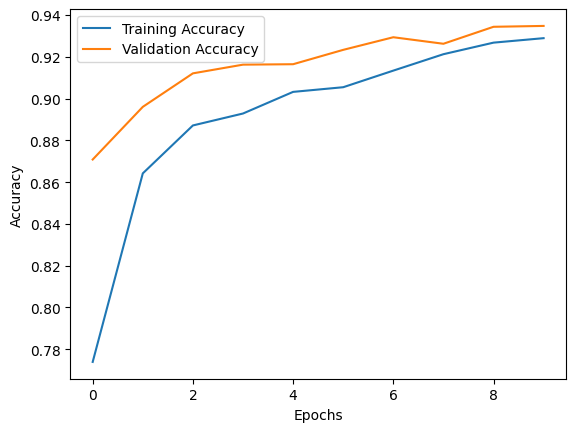

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot training history
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Training Loss')
# The training loss reflects how well the model is fitting the training data.
plt.plot(history.history['val_loss'], label='Validation Loss')
# validation loss is a metric used to assess the performance of a deep learning model on the validation set.

plt.legend()
plt.show()

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()


In [ ]:
y_pred = m2.predict(X_test)
y_pred

150/150 [==============================] - 0s 2ms/step


array([[7.2367541e-13],
       [1.0000000e+00],
       [9.9168509e-01],
       ...,
       [5.5215144e-01],
       [5.7711810e-01],
       [5.2747100e-19]], dtype=float32)

**Recall, f1 score, Precision**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
import numpy as np

y_pred = np.where(y_pred >= 0.5, 1, 0)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

accuracy = m2.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2380
           1       0.96      0.91      0.93      2420

    accuracy                           0.93      4800
   macro avg       0.94      0.93      0.93      4800
weighted avg       0.94      0.93      0.93      4800

150/150 [==============================] - 0s 3ms/step - loss: 0.1404 - accuracy: 0.9348
Accuracy: [0.14041785895824432, 0.9347916841506958]


In [ ]:
p0 = precision_score(y_test, y_pred, pos_label=0)
p1 = precision_score(y_test, y_pred, pos_label=1)

r0 = recall_score(y_test, y_pred, pos_label=0)
r1 = recall_score(y_test, y_pred, pos_label=1)

f10 = f1_score(y_test, y_pred, pos_label=0)
f11 = f1_score(y_test, y_pred, pos_label=1)

In [ ]:
print("Precision for NonFraud Class: ", p0)
print("Precision for Fraud Class: ", p1)

print("Recall for NonFraud Class: ", r0)
print("Recall for Fraud Class: ", r1)

print("F1 Score for NonFraud Class: ", f10)
print("F1 Score Fraud Class: ", f11)

Precision for NonFraud Class:  0.9148936170212766
Precision for Fraud Class:  0.9562581203984409
Recall for NonFraud Class:  0.9575630252100841
Recall for Fraud Class:  0.912396694214876
F1 Score for NonFraud Class:  0.9357421474029973
F1 Score Fraud Class:  0.9338126453795729


Evaluating how model performs for each class independently`

In [ ]:
from tabulate import tabulate

data = [
    ["NonFraud Class", p0, r0, f10],
    ["Fraud Class", p1, r1, f11]
]

heading = ["Class", "Precision", "Recall", "F1 Score"]

# Print the table
print(tabulate(data, headers=heading, tablefmt="grid"))


+----------------+-------------+----------+------------+
| Class          |   Precision |   Recall |   F1 Score |
+================+=============+==========+============+
| NonFraud Class |    0.914894 | 0.957563 |   0.935742 |
+----------------+-------------+----------+------------+
| Fraud Class    |    0.956258 | 0.912397 |   0.933813 |
+----------------+-------------+----------+------------+


**ROC_AUC Curve**

150/150 [==============================] - 1s 4ms/step


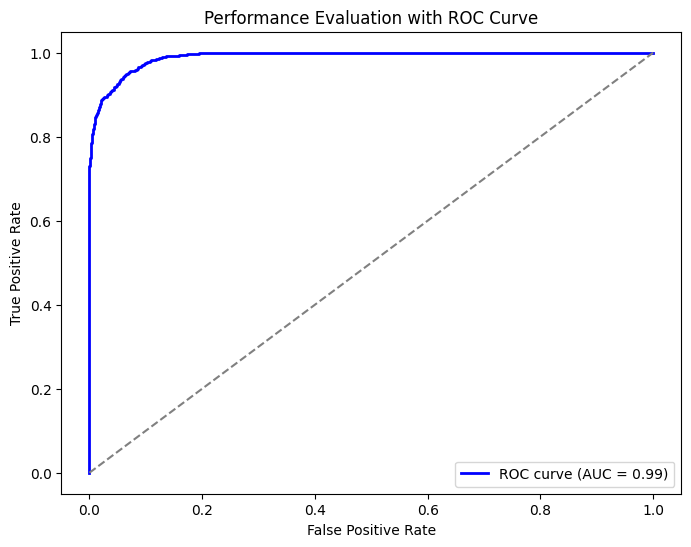

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Generating predicted probabilities for the +ve class
y_prob = m2.predict(X_test)

# Extract probabilities for the +ve class (class 1)
y_prob_positive = y_prob[:, 0]
# Assuming class 1 is the first column

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating AUC score
auc = roc_auc_score(y_test, y_prob)

# Ploting ROC curve
plt.figure(figsize=(8, 6))
plt.title("Performance Evaluation with ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend(loc='lower right')
plt.show()


Adding more neurons in input layer

In [ ]:
# Building the neural network model with more number of neurons in input layer
m3 = Sequential([
    Dense(units=2000, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2), #to prevent overfitting
    Dense(units=800, activation='relu'),
    Dropout(0.2),
    Dense(units=400, activation='relu'),  # Adding an additional hidden layer
    Dropout(0.2),  # Dropout layer after the additional hidden layer
     Dense(units=200, activation='relu'),  # Adding an additional hidden layer
    Dropout(0.2),  # Dropout layer after the additional hidden layer
    Dense(units=1, activation='sigmoid')  # Output layer with sigmoid activation
])

# Compiling the model
m3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = m3.fit(X_train, y_train, batch_size=2000, epochs=10, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = m3.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Making predictions
predictions = m3.predict(X_test)


Epoch 1/10
6/6 [==============================] - 6s 601ms/step - loss: 0.4887 - accuracy: 0.7771 - val_loss: 0.3234 - val_accuracy: 0.8692
Epoch 2/10
6/6 [==============================] - 3s 506ms/step - loss: 0.2939 - accuracy: 0.8585 - val_loss: 0.2746 - val_accuracy: 0.8827
Epoch 3/10
6/6 [==============================] - 3s 555ms/step - loss: 0.2554 - accuracy: 0.8899 - val_loss: 0.2419 - val_accuracy: 0.8877
Epoch 4/10
6/6 [==============================] - 5s 830ms/step - loss: 0.2286 - accuracy: 0.8986 - val_loss: 0.2260 - val_accuracy: 0.9004
Epoch 5/10
6/6 [==============================] - 3s 488ms/step - loss: 0.2145 - accuracy: 0.8987 - val_loss: 0.2093 - val_accuracy: 0.9031
Epoch 6/10
6/6 [==============================] - 3s 482ms/step - loss: 0.1987 - accuracy: 0.9106 - val_loss: 0.2046 - val_accuracy: 0.9102
Epoch 7/10
6/6 [==============================] - 3s 544ms/step - loss: 0.1929 - accuracy: 0.9143 - val_loss: 0.1862 - val_accuracy: 0.9123
Epoch 8/10
6/6 [====

150/150 [==============================] - 2s 11ms/step


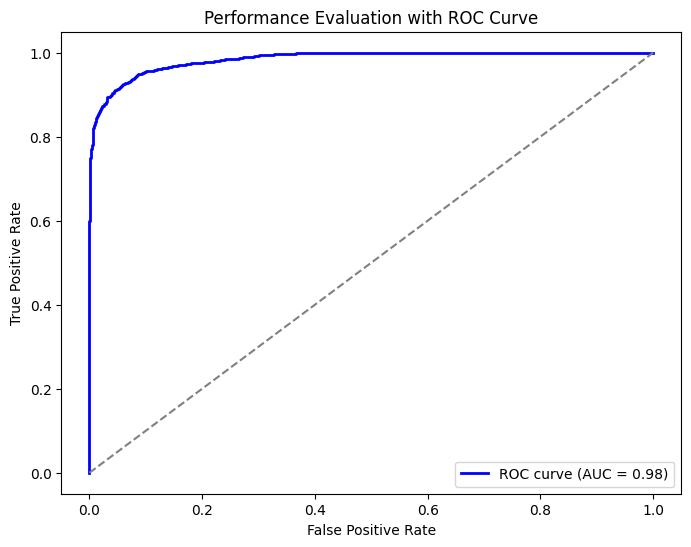

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate predicted probabilities for the +ve class
y_prob = m3.predict(X_test)

# Extracting probabilities for the +ve class (class 1)
y_prob_positive = y_prob[:, 0]
# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating AUC score
auc = roc_auc_score(y_test, y_prob)

# Ploting ROC curve
plt.figure(figsize=(8, 6))
plt.title("Performance Evaluation with ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')


plt.legend(loc='lower right')
plt.show()


Imbalanced Dataset

In [ ]:
import pandas as pd
# Separating DataFrame into 2 groups based on the 'isFraud' column
g0 = df[df['isFraud'] == 0]
g1 = df[df['isFraud'] == 1]

# Determining number of samples to take from each group, ensuring that the total is 16,000
num_g0 = int(2000 * len(g0) / (len(g0) + len(g1)))
num_g1 = 16000 - num_g0

# Sample from each group separately
sampled_g0 = g0.sample(n=num_g0, replace=True, random_state=42)
sampled_g1 = g1.sample(n=num_g1, replace=True, random_state=42)

# Concatenate the sampled groups to obtain a balanced dataset
imbalanced_df = pd.concat([sampled_g0, sampled_g1])


In [ ]:
imbalanced_df['isFraud'].value_counts()

isFraud
1    14003
0     1997
Name: count, dtype: int64

In [ ]:
ibdf = imbalanced_df

In [ ]:
type_new = pd.get_dummies(ibdf['type'], drop_first=True)
ibdf_new = pd.concat([ibdf, type_new], axis=1)
ibdf_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1694553,159,PAYMENT,7761.41,C1322676788,126330.00,118568.59,M805179360,0.00,0.00,0,0,False,False,True,False
4308043,307,PAYMENT,9363.17,C1025671823,427248.51,417885.34,M1162917018,0.00,0.00,0,0,False,False,True,False
4930379,350,PAYMENT,28035.27,C153907869,9890.00,0.00,M108610323,0.00,0.00,0,0,False,False,True,False
2236606,186,CASH_OUT,394781.26,C695870266,412.00,0.00,C374707826,37951.44,432732.71,0,0,True,False,False,False
1571764,155,CASH_OUT,166078.15,C111564550,0.00,0.00,C1379031360,20974596.81,21140674.96,0,0,True,False,False,False


In [ ]:
X = ibdf_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = ibdf_new['isFraud']
X.shape, y.shape

((16000, 11), (16000,))

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the neural network model
model = Sequential([
        Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)), # 64 neurons in 1st layer
        Dropout(0.2),
        Dense(units=32, activation='relu'), ## 32 neurons in 2nd layer with 64 neurons as input
        Dropout(0.2),
        Dense(units=1, activation='sigmoid') #1 neuron because binary classification
    ])
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Making predictions
predictions = model.predict(X_test)


Epoch 1/10
175/175 [==============================] - 1s 4ms/step - loss: 0.4180 - accuracy: 0.8163 - val_loss: 0.2817 - val_accuracy: 0.8742
Epoch 2/10
175/175 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.8753 - val_loss: 0.2329 - val_accuracy: 0.8981
Epoch 3/10
175/175 [==============================] - 0s 3ms/step - loss: 0.2455 - accuracy: 0.8871 - val_loss: 0.2165 - val_accuracy: 0.9050
Epoch 4/10
175/175 [==============================] - 1s 3ms/step - loss: 0.2285 - accuracy: 0.8976 - val_loss: 0.1997 - val_accuracy: 0.9146
Epoch 5/10
175/175 [==============================] - 1s 4ms/step - loss: 0.2147 - accuracy: 0.9037 - val_loss: 0.1932 - val_accuracy: 0.9167
Epoch 6/10
175/175 [==============================] - 1s 4ms/step - loss: 0.2036 - accuracy: 0.9101 - val_loss: 0.1825 - val_accuracy: 0.9229
Epoch 7/10
175/175 [==============================] - 1s 4ms/step - loss: 0.1972 - accuracy: 0.9145 - val_loss: 0.1803 - val_accuracy: 0.9215
Epoch 

Accuracy slightly reduces for imbalanced dataset

**Trying out with Unsupervised Learning**

**K Means**

In [ ]:
X = bdf_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = bdf_new['isFraud']
X.shape, y.shape

((16000, 11), (16000,))

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1694553,159,7761.41,126330.00,118568.59,0.00,0.00,0,False,False,True,False
4308043,307,9363.17,427248.51,417885.34,0.00,0.00,0,False,False,True,False
4930379,350,28035.27,9890.00,0.00,0.00,0.00,0,False,False,True,False
2236606,186,394781.26,412.00,0.00,37951.44,432732.71,0,True,False,False,False
1571764,155,166078.15,0.00,0.00,20974596.81,21140674.96,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1030319,56,82767.31,82767.31,0.00,0.00,0.00,0,False,False,False,True
6168674,557,131050.76,131050.76,0.00,5291949.84,5423000.60,0,True,False,False,False
5987970,413,8536151.16,8536151.16,0.00,339032.24,8875183.40,0,True,False,False,False
1005246,46,35016.23,35016.23,0.00,0.00,0.00,0,False,False,False,True


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#number of clusters
n = 3

#KMeans model
kmeans = KMeans(n_clusters=n, random_state=42)

# Fit
kmeans.fit(X_train_scaled)

# Predict
train_cluster = kmeans.predict(X_train_scaled)
test_cluster = kmeans.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, train_cluster)
test_acc = accuracy_score(y_test, test_cluster)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training Accuracy: 0.4238392857142857
Testing Accuracy: 0.43041666666666667


In [ ]:
print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)


Shape of X (features): (16000, 11)
Shape of y (labels): (16000,)


Silhouette Score: 0.3161687837262099


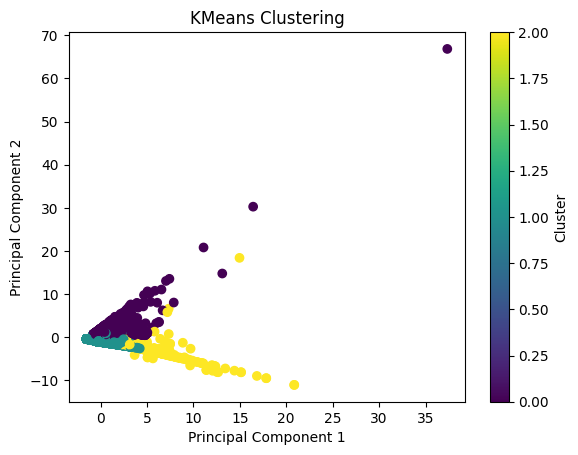

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# silhouette score
silhouette_avg = silhouette_score(X_train_scaled, train_cluster)
print("Silhouette Score:", silhouette_avg)

# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)


plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_cluster, cmap='viridis')
plt.title("KMeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


**Elbow Method for optimal K**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

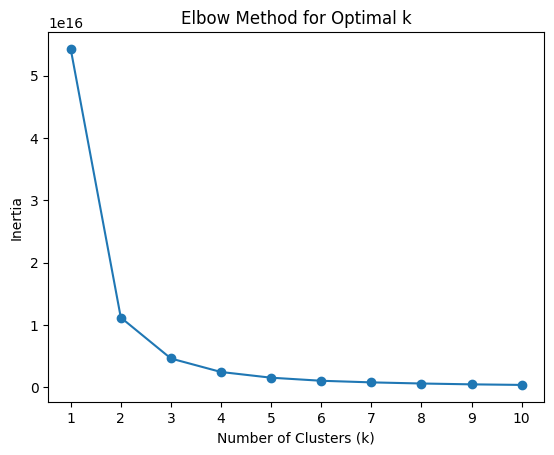

In [ ]:
# two features for visualization
X_visualize = X[['isFlaggedFraud', 'amount']]

# range of cluster numbers
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_visualize)
    inertia_values.append(kmeans.inertia_)

# Elbow Curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()


In [ ]:
# Find the optimal k value (elbow point)
optimal_k = np.argmin(np.diff(inertia_values)) + 1
print("Optimal number of clusters (k):", optimal_k)

Optimal number of clusters (k): 1


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#number of clusters = 1
n = 1

#KMeans model
kmeans = KMeans(n_clusters=n, random_state=42)

# Fit
kmeans.fit(X_train_scaled)

# Predict
train_cluster = kmeans.predict(X_train_scaled)
test_cluster = kmeans.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, train_cluster)
test_acc = accuracy_score(y_test, test_cluster)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training Accuracy: 0.5008035714285715
Testing Accuracy: 0.49583333333333335


The accuracy did improve

**Comparison**

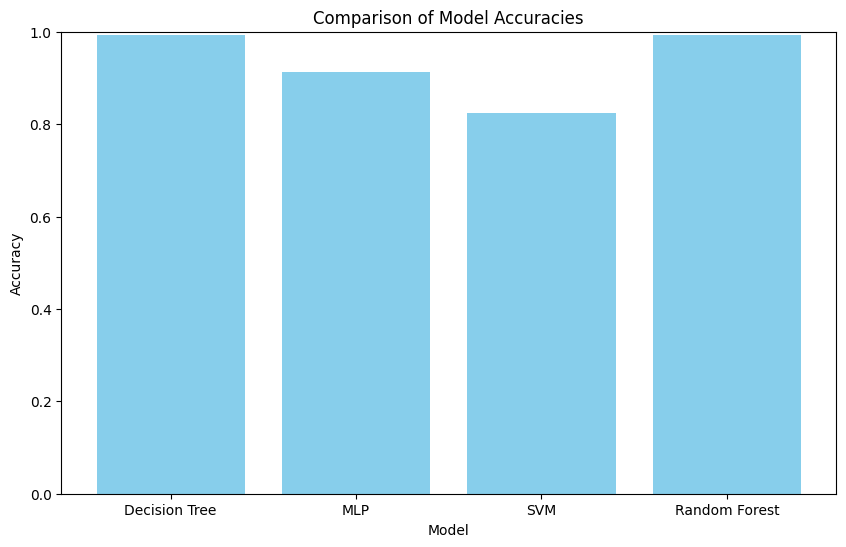

In [ ]:
import matplotlib.pyplot as plt

accuracies = {
    'Decision Tree': 0.993125,
    'MLP': 0.911875,
    'SVM': 0.825,
    'Random Forest': 0.9922916666666667
}

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()
